# Description

Training a CNN to recognize music genres. CNNs work best with images but turns out, they can be pretty great for audio signals too when we consider spectograms or MFCCs to be a greyscale image with depth = 1 and take amplitudes as pixel value.

# Packages

In [2]:
import numpy as np
from utils import load_data, split_dataset, plot_history
import tensorflow as tf

# Loading data

In [3]:
DATA_PATH = "preprocessed_raw_audio_data.json"

In [4]:
features, target = load_data(DATA_PATH)

In [5]:
features.shape 

(9986, 130, 13)

In [6]:
target.shape

(9986,)

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X=features, y=target, t_size=0.25, v_size=0.2, for_CNN=True)

In [8]:
X_train.shape

(5991, 130, 13, 1)

# Model Definition

In [9]:
model = tf.keras.Sequential()


# first conv layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="same"))
model.add(tf.keras.layers.BatchNormalization())

# second conv layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="same"))
model.add(tf.keras.layers.BatchNormalization())

# 3rd
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation= 'relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

# output
model.add(tf.keras.layers.Dense(10, activation='softmax'))




c:\Users\acer\Desktop\Projects\Music Genre Classifier\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 4, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 1, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,514 (177.79 KB)

 Trainable params: 45,322 (177.04 KB)

 Non-trainable params: 192 (768.00 B)

# Training

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1560 - loss: 2.8729 - val_accuracy: 0.3278 - val_loss: 1.9303
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3091 - loss: 2.0440 - val_accuracy: 0.4239 - val_loss: 1.6143
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3780 - loss: 1.7456 - val_accuracy: 0.4726 - val_loss: 1.4708
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4322 - loss: 1.5860 - val_accuracy: 0.4933 - val_loss: 1.3985
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4815 - loss: 1.4805 - val_accuracy: 0.5180 - val_loss: 1.3139
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4923 - loss: 1.3940 - val_accuracy: 0.5427 - val_loss: 1.2588
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5111 - loss: 1.3489 - val_accuracy: 0.5567 - val_loss: 1.2268
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5356 - loss: 1.2831 - val_accu

# Evaluation and prediction

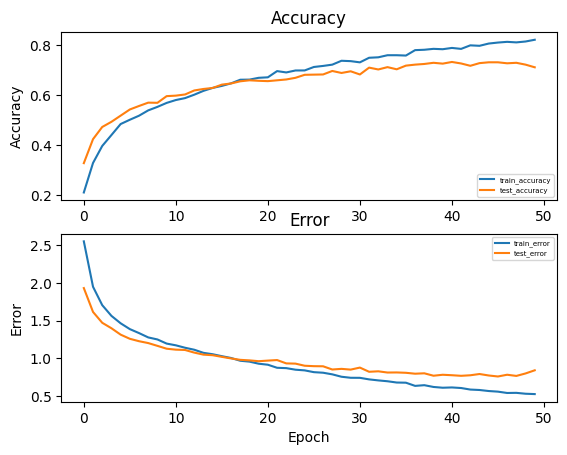

In [12]:
plot_history(history)

In [13]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Accuracy on test set: {test_accuracy}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6813 - loss: 0.8914
Accuracy on test set: 0.6880256533622742


In [14]:
X = X_test[1]
X=X[np.newaxis, ...]

y= y_test[1]

y_cap = tf.argmax(model.predict(X), axis=1)[0]

print(f"Predicted genre: {y_cap} \n Actual genre: {y}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted genre: 2 
 Actual genre: 2


In [15]:
model.save('./models/cnn_genre_classifier.keras')